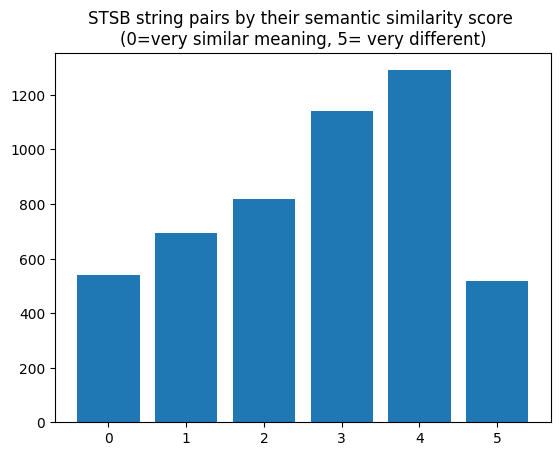

In [2]:
import matplotlib.pyplot as plt

from dataset import DS_STSB_REF_PATH, SIMILARITY_SCORE, DS_STSB_TEST_SIZE
from util import read_from_file, from_json

stsb_dict = from_json(read_from_file(DS_STSB_REF_PATH))
assert DS_STSB_TEST_SIZE == len(stsb_dict), str(DS_STSB_TEST_SIZE) + " <> " + str(len(stsb_dict))

sim_bucket = [0] * 6
for item  in stsb_dict.values():
    sim_bucket[round(item[SIMILARITY_SCORE])] += 1
assert  DS_STSB_TEST_SIZE == sum(sim_bucket), DS_STSB_TEST_SIZE + "<>" + sum(sim_bucket)

similarity_score = ["0", "1", "2", "3", "4", "5"]
counts = [sim_bucket[i] for i in range(6)]
_, ax = plt.subplots()
ax.bar(similarity_score, counts)
ax.set_title("STSB string pairs by semantic similarity score "
             "\n(0=very similar meaning, 5= very different)")
plt.show()

dict_keys(['cosine_similarity', 'distance', 'similarity_score'])
dict_keys(['amazon.titan-embed-text-v2:0', 'cohere.embed-english-v3', 'platform.mistral-embed'])
amazon.titan-embed-text-v2:0  - min dist: 0.0  - max: 1.4617826037500636
cohere.embed-english-v3  - min dist: 0.0  - max: 1.406618105806446
platform.mistral-embed  - min dist: 0.0  - max: 1.0065714965395895


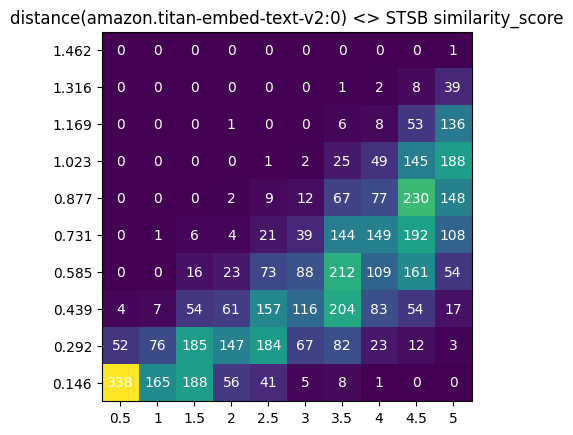

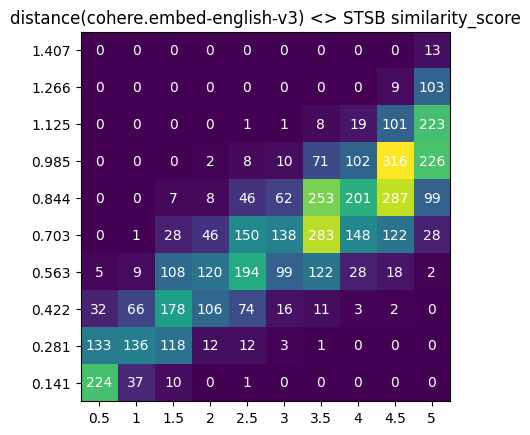

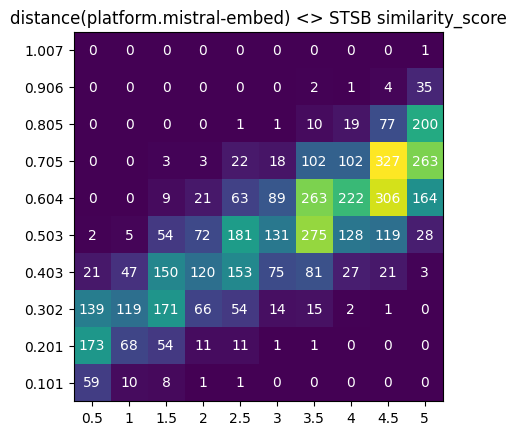

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from metric import create_metrics
from dataset import DS_STSB_EMBED_PATH, DISTANCE, COSINE

dataset = DS_STSB_EMBED_PATH
metrics = create_metrics(dataset)
print(metrics.keys())
assert 3 == len(metrics)
print(metrics[DISTANCE].keys())
x_labels = ["0.5", "1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

metric = DISTANCE
for engine in metrics[metric]:
    min_metric = min(metrics[metric][engine]["sentence2-sentence1"])
    max_metric = max(metrics[metric][engine]["sentence2-sentence1"])
    steps = 10
    metric_step = (max_metric - min_metric) / steps
    y_labels = [0] * steps
    for i in range(steps):
        y_labels[i] = round((steps - i) * metric_step,3)
    dist_interval = (max_metric - min_metric) / steps
    print(engine, " - min dist:", min_metric," - max:", max_metric)
    heat_map = np.array([[0] * steps] * steps)
    for i, distance in  enumerate(metrics[metric][engine]["sentence2-sentence1"]):
        x_coord = min(9,round(metrics[SIMILARITY_SCORE][i] / 0.5))
        y_coord = min(9,round((distance - min_metric) / dist_interval))
        heat_map[y_coord,x_coord] += 1
       
    assert len(metrics[metric][engine]["sentence2-sentence1"]) == np.sum(heat_map)
    # heat_map[7,2] = 555
    
    fig, ax = plt.subplots()
    ax.set_title( metric +"(" + engine + ")" + " <> " + "STSB " + SIMILARITY_SCORE)
    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, heat_map[i, j],
                       ha="center", va="center", color="w")
    im = ax.imshow(heat_map)
